# Company Financials Dataset

Este conjunto de datos es un archivo que representa un resumen de ventas y beneficios por mercado, país/región, producto y otros factores clave. 

A continuación se presenta un desglose detallado de cada columna: 

* **Segment**: Representa el segmento de mercado (*e.g., Government, Midmarket, Enterprise*). Sirve para identificar la contribución de cada segmento al total de las ventas y beneficios.
* **Country**: Es el país o región donde se realizaron las ventas. Permite localizar los mercados más fuertes geográficamente.
* **Product**: El tipo de producto vendido (*e.g., Carretera, Montana, Paseo*). Esto ayuda a analizar qué productos son los más populares y rentables.
* **Discount Band**: Representa el nivel de descuento aplicado. En este caso, parece que todos los descuentos son "None", lo que indica que no hubo descuentos aplicados directamente.
* **Units Sold**: El número de unidades vendidas. Es un factor clave para calcular las métricas de ventas y beneficios.
* **Manufacturing Price**: El costo de fabricación por unidad del producto. Sirve para calcular márgenes de ganancia.
* **Sale Price**: El precio de venta por unidad. Refleja la estrategia de precios de la empresa.
* **Gross Sales**: Ingresos brutos generados antes de aplicar descuentos. Calculado como:

        Gross Sales = Units Sold x Sale Price

* **Discounts**: Los descuentos totales aplicados. En este dataset aparecen como $-, lo que implica que no hubo descuentos registrados.
* **Sales**: Ventas netas, después de descuentos. En este caso, como no hay descuentos, **Gross Sales = Sales**.
* **COGS** (Cost of Goods Sold): El costo de los bienes vendidos. Calculado como:

        COGS = Units Sold x Manufacturing Price

* **Profit**: La ganancia neta obtenida. Calculada como:

        Profit = Sales - COGS

* **Date, Month Number, Month Name, Year**: Información temporal que detalla cuándo se realizó la venta. Esto es útil para identificar tendencias estacionales y patrones de compra.

## Lectura de Datos

In [3]:
pip install pandas matplotlib seaborn plotly geopandas folium


Note: you may need to restart the kernel to use updated packages.


In [4]:
import csv as csv
from statistics import mean
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

In [6]:
datos_df = pd.read_csv('./data/Financials.csv')
datos_df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [7]:
from IPython.display import display
display(datos_df)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


### Información general y descripción estadística

In [8]:
#Column type
datos_df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [9]:
print(datos_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [10]:
datos_df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


## Preprocesamiento

### Limpieza de Datos

Se comenzará el preprocesamiento de los datos con una limpieza básica de ellos. El primer paso será modificar el nombre de las columnas para después detectar la existencia de valores nulos en el conjunto de datos:

In [11]:
datos_df = datos_df.rename(columns = {
    'Segment': 'segment',
    'Country': 'country',
    ' Product ': 'product',
    ' Discount Band ': 'discount_band',
    ' Units Sold ': 'units_sold',
    ' Manufacturing Price ': 'manufacturing_price',
    ' Sale Price ': 'sale_price',
    ' Gross Sales ': 'gross_sales',
    ' Discounts ': 'discounts',
    '  Sales ': 'sales',
    ' COGS ': 'cogs',
    ' Profit ': 'profit',
    'Date': 'date',
    'Month Number': 'month_number',
    ' Month Name ': 'month_name',
    'Year': 'year'
})

In [12]:

datos_df.isnull().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64

No existe ningún valor nulo o faltante en nuestro CSV. 


A continuación se muestra una fila completa del conjutno de datos:

Midmarket,France, Paseo , None , $549.00 , $10.00 , $15.00 ," $8,235.00 ", $-   ," $8,235.00 "," $5,490.00 "," $2,745.00 ",01/09/2013,9, September ,2013

Como puede observarse, existen carácteres especiales que han de ser eliminados del dataset para poder trabajar de forma correcta con los datos, además, el valor de la cuarta columna, en muchos ejemplos toma valor "none".

Se muestra entonces, punto por punto, los pasos a seguir hasta dar con un dataset completamente funcional:



#### Eliminar espacios en blanco de las columnas.

In [13]:
datos_df.columns = datos_df.columns.str.strip()
datos_df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

#### Identificar y limpiar columnas numéricas

In [14]:
numeric_columns = [
    'units_sold', 'manufacturing_price', 'sale_price',
    'gross_sales', 'discounts', 'sales', 'cogs', 'profit'
]

Recordemos los valores que toman dichas columnas numéricas:


In [15]:
print(datos_df[numeric_columns])

      units_sold manufacturing_price sale_price     gross_sales  \
0     $1,618.50               $3.00     $20.00      $32,370.00    
1     $1,321.00               $3.00     $20.00      $26,420.00    
2     $2,178.00               $3.00     $15.00      $32,670.00    
3       $888.00               $3.00     $15.00      $13,320.00    
4     $2,470.00               $3.00     $15.00      $37,050.00    
..           ...                 ...        ...             ...   
695   $2,475.00             $260.00    $300.00    $7,42,500.00    
696     $546.00             $260.00    $300.00    $1,63,800.00    
697   $1,368.00               $5.00      $7.00       $9,576.00    
698     $723.00              $10.00      $7.00       $5,061.00    
699   $1,806.00             $250.00     $12.00      $21,672.00    

          discounts           sales            cogs        profit  
0             $-        $32,370.00      $16,185.00    $16,185.00   
1             $-        $26,420.00      $13,210.00    $13,2

A simple vista puede observarse que existen carácteres como "$", ",", "/" o espacios que serán eliminados a continuación:


In [16]:
for col in numeric_columns:
    datos_df[col] = (
        datos_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)       # Eliminar comas
        .str.replace(r'\(|\)', '', regex=True)  # Eliminar paréntesis
        .str.replace(r'\$', '', regex=True)     # Eliminar signos de dólar
        .str.replace('-', '0', regex=False)     # Reemplazar guiones con ceros
        .str.strip()                            # Eliminar espacios
        .astype(float)                          # Convertir a flotante
    )

In [17]:
print(datos_df)

              segment                   country      product discount_band  \
0          Government                    Canada   Carretera          None    
1          Government                   Germany   Carretera          None    
2           Midmarket                    France   Carretera          None    
3           Midmarket                   Germany   Carretera          None    
4           Midmarket                    Mexico   Carretera          None    
..                ...                       ...          ...           ...   
695    Small Business                    France    Amarilla          High    
696    Small Business                    Mexico    Amarilla          High    
697        Government                    Mexico     Montana          High    
698        Government                    Canada       Paseo          High    
699  Channel Partners  United States of America         VTT          High    

     units_sold  manufacturing_price  sale_price  gross_sales  

El segundo paso entonces será asegurarnos de que la fecha está en un formato correcto:

In [18]:
datos_df['date'] = pd.to_datetime(datos_df['date'], format='%d/%m/%Y')

In [19]:
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

#### Reemplazo de valores en 'product' para mejorar el análisis y entendimiento del proyecto

Debido a que los productos de la columna 'product' resultan complicados de interpretar, se ha optado por hacer una permuta de ellos. Teniendo en cuenta el precio de producción y el precio de venta de cada uno de ellos, se ha llegado al siguiente acuerdo: 

1. **Amarilla** pasará a ser un **Teclado inalámbrico compacto**
Manufacturing Price: 260 USD
Descripción: Amarilla es un teclado inalámbrico compacto y ergonómico, diseñado para usuarios que buscan una experiencia de escritura fluida y cómoda. Con un diseño minimalista y teclas silenciosas, este teclado es perfecto para profesionales que necesitan un dispositivo confiable tanto en la oficina como en casa. La conectividad Bluetooth permite usarlo con una amplia variedad de dispositivos, incluyendo laptops, tablets y teléfonos móviles.

Razonamiento: Con un precio de fabricación elevado, este teclado combina características premium como la retroiluminación ajustable y la ergonomía avanzada, lo que lo convierte en la opción ideal para usuarios exigentes que valoran la comodidad y la funcionalidad en su equipo de trabajo.

2. **Carretera** pasará a ser un **Altavoz Bluetooth portátil básico**
Manufacturing Price: 3 USD
Descripción: Carretera es un altavoz Bluetooth compacto y económico perfecto para reproducir música o realizar llamadas mientras viajas. Ideal para escuchar en el auto, en el parque o en cualquier espacio al aire libre.

Razonamiento: Un producto sencillo, económico y funcional, diseñado para usuarios que buscan un altavoz básico sin muchas complicaciones.

3. **Montana** pasará a ser un **Termómetro de cocina digital**
Manufacturing Price: 5 USD
Descripción: Montana es un termómetro de cocina digital diseñado para medir la temperatura de alimentos con rapidez y precisión. Es ideal para quienes buscan mantener una alimentación saludable y cocinar con exactitud.

Razonamiento: Dispositivo básico y de bajo costo, pero muy útil para aficionados de la cocina y la comida saludable.

4. **Paseo** pasará a ser una **Pulsera de actividad fitness básica**
Manufacturing Price: 10 USD
Descripción: Paseo es una pulsera de actividad básica que rastrea pasos, distancia recorrida y calidad de sueño. Ideal para quienes buscan monitorear su actividad diaria sin complicaciones.

Razonamiento: Este producto ofrece funcionalidad básica con un precio asequible, adecuado para usuarios principiantes en la tecnología de salud.

5. **VTT** pasará a ser una **Cámara de seguridad IP básica**
Manufacturing Price: 250 USD
Descripción: VTT es una cámara de seguridad IP con visión nocturna y grabación en alta definición. Perfecta para proteger el hogar, oficina o negocio, fácil de instalar y controlar a través de una aplicación.

Razonamiento: Cámara de seguridad con buen precio y prestaciones básicas, adecuada para uso doméstico.

6. **Velo** pasará a ser un **Smartwatch económico**
Manufacturing Price: 120 USD
Descripción: Velo es un smartwatch básico que ofrece seguimiento de actividad física, notificaciones de mensajes y llamadas, y funciones de monitoreo de salud como frecuencia cardíaca y calidad del sueño.

Razonamiento: Un reloj inteligente accesible y funcional, ideal para aquellos que buscan lo esencial sin pagar por funciones avanzadas.



In [20]:
# Limpiar espacios en blanco antes y después de los valores en la columna 'product'
datos_df['product'] = datos_df['product'].str.strip()

# Crear el diccionario de reemplazo
reemplazos = {
    "Amarilla": "teclado",
    "Carretera": "altavoz",
    "Montana": "termometro",
    "Paseo": "pulsera",
    "VTT": "camara",
    "Velo": "smartwatch"
}

# Aplicar los reemplazos en la columna 'product'
datos_df['product'] = datos_df['product'].replace(reemplazos)

# Verificar los cambios únicos en la columna 'product'
print("Valores únicos actualizados en 'product':")
print(datos_df['product'].unique())

# Mostrar las primeras filas del DataFrame actualizado
print("\nDataFrame actualizado:")
print(datos_df.head())




Valores únicos actualizados en 'product':
['altavoz' 'termometro' 'pulsera' 'smartwatch' 'camara' 'teclado']

DataFrame actualizado:
      segment  country  product discount_band  units_sold  \
0  Government   Canada  altavoz         None       1618.5   
1  Government  Germany  altavoz         None       1321.0   
2   Midmarket   France  altavoz         None       2178.0   
3   Midmarket  Germany  altavoz         None        888.0   
4   Midmarket   Mexico  altavoz         None       2470.0   

   manufacturing_price  sale_price  gross_sales  discounts    sales     cogs  \
0                  3.0        20.0      32370.0        0.0  32370.0  16185.0   
1                  3.0        20.0      26420.0        0.0  26420.0  13210.0   
2                  3.0        15.0      32670.0        0.0  32670.0  21780.0   
3                  3.0        15.0      13320.0        0.0  13320.0   8880.0   
4                  3.0        15.0      37050.0        0.0  37050.0  24700.0   

    profit       da

A continuación se muestra una tabla resumen de los cambios realizados:
"Amarilla": "teclado",
    "Carretera": "altavoz",
    "Montana": "termometro",
    "Paseo": "pulsera",
    "VTT": "camara",
    "Velo": "smartwatch"

| Producto Inicial | Producto definitivo
|----------|----------
|Amarilla    | teclado   
| Carretera    | altavoz   
| Montana    | termometro
| Paseo    | pulsera
| VTT    | camara
| Velo    | smartwatch   

### Análisis Exploratorio y Visualizaciones

Para aumentar el conocimiento sobre los datos, se realizará un análisis exploratorio de los datos basados en los requerimientos del negocio:


#### Análisis comparativo por país

Se identificará el desempeño en términos de ventas, beneficios y márgenes en cada país.

In [21]:
grouped_data = datos_df.groupby(['country', 'product']).agg({
    'manufacturing_price': 'mean',              
    'sale_price': 'mean',           
    'units_sold': 'sum'        
}).reset_index()

grouped_data.rename(columns={
    'manufacturing': 'Average Manufacturing Price',
    'sales': 'Average Sale Price',
    'units_sold': 'Units Sold'
}, inplace=True)

grouped_data

,country,product,manufacturing_price,sale_price,Units Sold
0,Canada,altavoz,3.0,86.800000,34804.0
1,Canada,camara,250.0,143.090909,41248.5
2,Canada,pulsera,10.0,113.809524,78191.5
3,Canada,smartwatch,120.0,108.600000,32464.0
4,Canada,teclado,260.0,169.888889,29232.0
5,Canada,termometro,5.0,93.666667,31488.5
6,France,altavoz,3.0,113.611111,34056.0
7,France,camara,250.0,139.181818,35774.5
8,France,pulsera,10.0,92.275000,71606.0
9,France,smartwatch,120.0,142.863636,36609.5


Visualización del análisis comparativo:


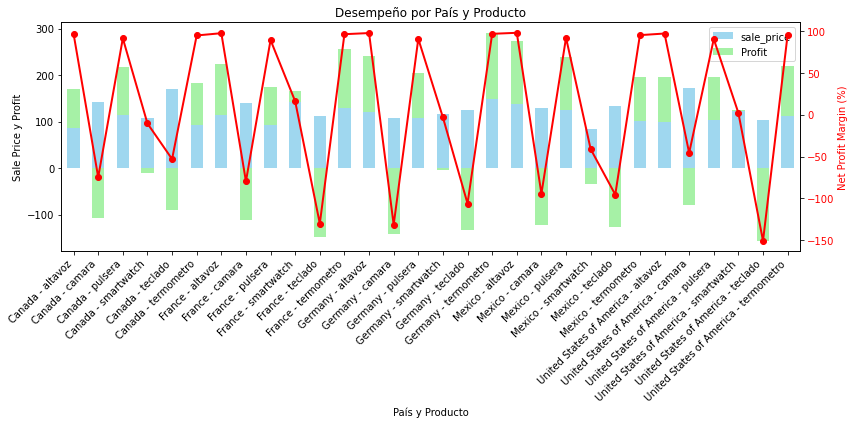

In [22]:
# Asegurándonos de que 'Profit' esté en grouped_data
grouped_data['Profit'] = grouped_data['sale_price'] - grouped_data['manufacturing_price']

# Asegurarnos de que 'Net Profit Margin (%)' esté en grouped_data
grouped_data['Net Profit Margin (%)'] = (grouped_data['Profit'] / grouped_data['sale_price']) * 100

# Crear el gráfico de barras con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar 'Sale Price' y 'Profit' en el primer eje Y
grouped_data[['sale_price', 'Profit']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax1, 
    color=['skyblue', 'lightgreen'],
    alpha=0.8
)
ax1.set_xlabel('País y Producto')
ax1.set_ylabel('Sale Price y Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear el segundo eje Y para el Net Profit Margin (%) y graficarlo
ax2 = ax1.twinx()
grouped_data['Net Profit Margin (%)'].plot(
    kind='line', 
    ax=ax2, 
    color='red', 
    marker='o', 
    linewidth=2, 
    label='Net Profit Margin'
)
ax2.set_ylabel('Net Profit Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar título y ajustar etiquetas del eje X
plt.title('Desempeño por País y Producto')
ax1.set_xticklabels(grouped_data['country'] + ' - ' + grouped_data['product'], rotation=45, ha='right')

# Ajustar diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()


#### Análisis comparativo por país

Se identificará el desempeño en términos de ventas, beneficios y márgenes en cada país.

In [23]:
comparacion_df = datos_df.groupby('country').agg({
    'sales': 'sum',
    'profit': 'sum',
    'cogs': 'sum',
    'sale_price': 'mean',
    'manufacturing_price': 'mean',
    'discounts': 'sum'   
}).rename(columns = {
    'sales': 'Total Sales',
    'profit': 'Total Profit',   
    'cogs': 'Total COGS',   
    'sale_price': 'Average Sale Price',
    'manufacturing_price': 'Average Manufacturing Price',
    'discounts': 'Total Discounts'
})

El beneficio neto se refiere a las ganancias después de restar los costos de producción, entre otros. Con ello se podrá obtener una visión clara de qué tan rentable es una empresa en relación con sus ingresos:

        Margen de Beneficio Neto = ((Beneficio Total)/(Ventas Totales)) x 100

In [24]:
comparacion_df['Net Profit Margin (%)'] = ((comparacion_df['Total Profit'] / comparacion_df['Total Sales']) * 100).round(2) 
comparacion_df['Net Profit Margin (%)'] = comparacion_df['Net Profit Margin (%)'] / 100

print(comparacion_df)

                          Total Sales  Total Profit  Total COGS  \
country                                                           
Canada                    24887654.89    3858206.39  21358426.0   
France                    24354172.29    4032488.29  20573151.5   
Germany                   23505340.82    3961381.32  19824952.0   
Mexico                    20949352.11    3198923.11  18041829.0   
United States of America  25029830.18    3397345.68  22034289.5   

                          Average Sale Price  Average Manufacturing Price  \
country                                                                     
Canada                            118.428571                    93.928571   
France                            118.428571                    95.528571   
Germany                           118.428571                    95.500000   
Mexico                            118.428571                    95.671429   
United States of America          118.428571                   101.7

Visualización del análisis comparativo

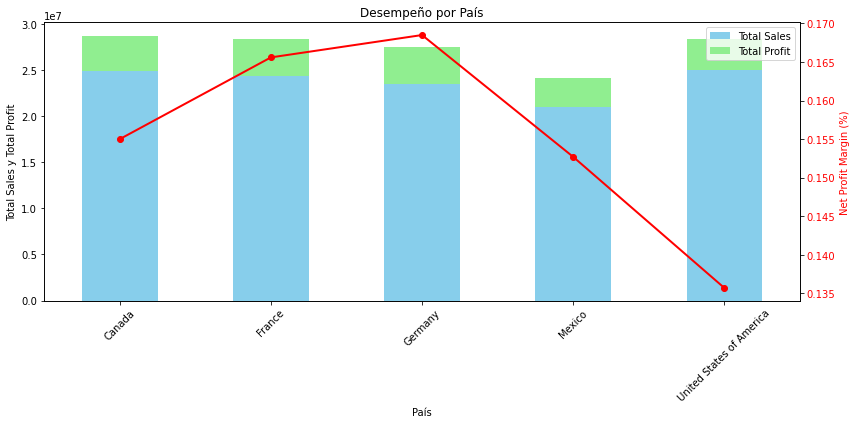

In [25]:
# Crear el gráfico de barras con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar Total Sales y Total Profit en el primer eje Y
comparacion_df[['Total Sales', 'Total Profit']].plot(kind='bar', stacked=True, ax=ax1, color=['skyblue', 'lightgreen'])
ax1.set_xlabel('País')
ax1.set_ylabel('Total Sales y Total Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear el segundo eje Y para el Net Profit Margin (%) y graficarlo
ax2 = ax1.twinx()
comparacion_df['Net Profit Margin (%)'].plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Net Profit Margin')
ax2.set_ylabel('Net Profit Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar título y leyenda
plt.title('Desempeño por País')
ax1.set_xticklabels(comparacion_df.index, rotation=45)
fig.tight_layout()

# Mostrar el gráfico
plt.show()

Puede observar que EEUU tiene las ventas totales más altas con un valor de 25,029,830.18$ mientras que méxico tiene las más bajas.

Respecto al beneficio total, es decir, las ganancias después de descontar los costos de producción (COGS) de las ventas, Francia y Alemania tienen el mayor beneficio total con 4,032,488.29 y 3,961,381.32 respectivamente. A destacar, que EEUU tiene un beneficio sorprendentemente bajo, con 3397345.68$, junto con México. Esto podría indicar que la eficiencia en mucho menor.

El COGS, costo asociado con la producción de los productos vendidos, alcanza un valor de 22,034,289.5 en EEUU, costo bastante elevado. Alemania y Francia presentan los COGS más bajos, que podría indicar un controlmás eficiente de los costos de producción. 

Respecto al Average Manufacturing Price (Precio Promedio de Fabricación), EEUU tiene el promedio más alto seguido por Canada.

EEUU tiene además, los descuentos totales más altos, es decir, todo indica que utiliza una estrategia de descuentos mucho más agresiva para estimular las ventas.

#### Análisis de márgenes de beneficio por producto


El objetivo será destacar oportunidades

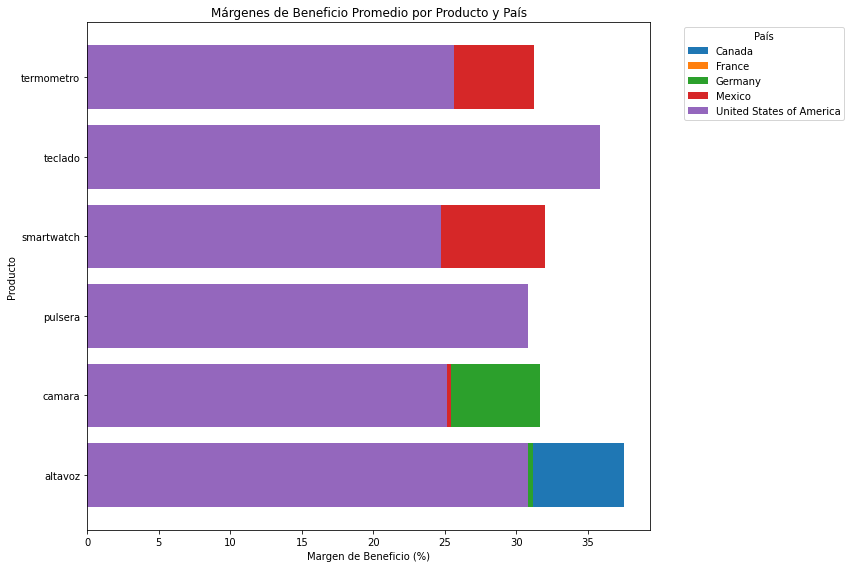

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que `datos_df` ya está definido con las columnas necesarias: 'country', 'product', 'profit', 'sales'

# Cálculo de margen de beneficio
datos_df['Profit Margin (%)'] = ((datos_df['profit'] / datos_df['sales']) * 100).round(2)

# Promedio de margen de beneficio por producto y país
avg_profit_margin = datos_df.groupby(['country', 'product'])['Profit Margin (%)'].mean().reset_index()

# Visualización
plt.figure(figsize=(12, 8))

for country in avg_profit_margin['country'].unique():
    country_data = avg_profit_margin[avg_profit_margin['country'] == country]
    plt.barh(country_data['product'], country_data['Profit Margin (%)'], label=country)

plt.title('Márgenes de Beneficio Promedio por Producto y País')
plt.xlabel('Margen de Beneficio (%)')
plt.ylabel('Producto')
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Investigar que coño son esos productos 
idea: buscar si los un producto es solo de un pais o de varios

#### Análisis de descuentos

Analizar los niveles promedio de descuento por producto y evaluar su impacto en las ventas.


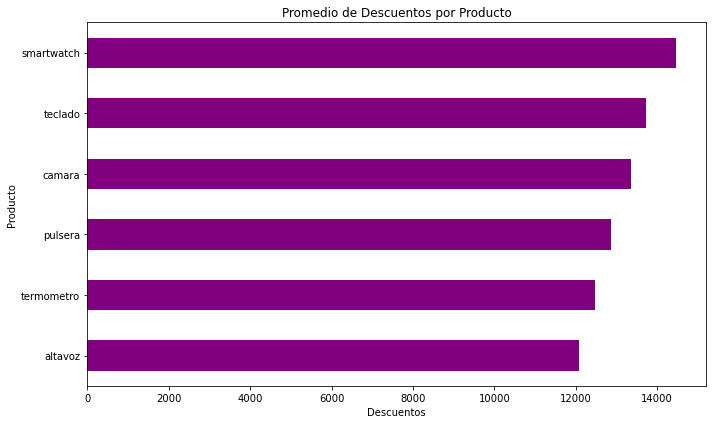

In [27]:

avg_discounts = datos_df.groupby('product')['discounts'].mean()

# Visualización
plt.figure(figsize=(10, 6))
avg_discounts.sort_values().plot(kind='barh', color='purple')
plt.title('Promedio de Descuentos por Producto')
plt.xlabel('Descuentos')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()



#### Análisis temporal de ventas

A continuación se examinarán tendencias estacionales o anuales en las ventas

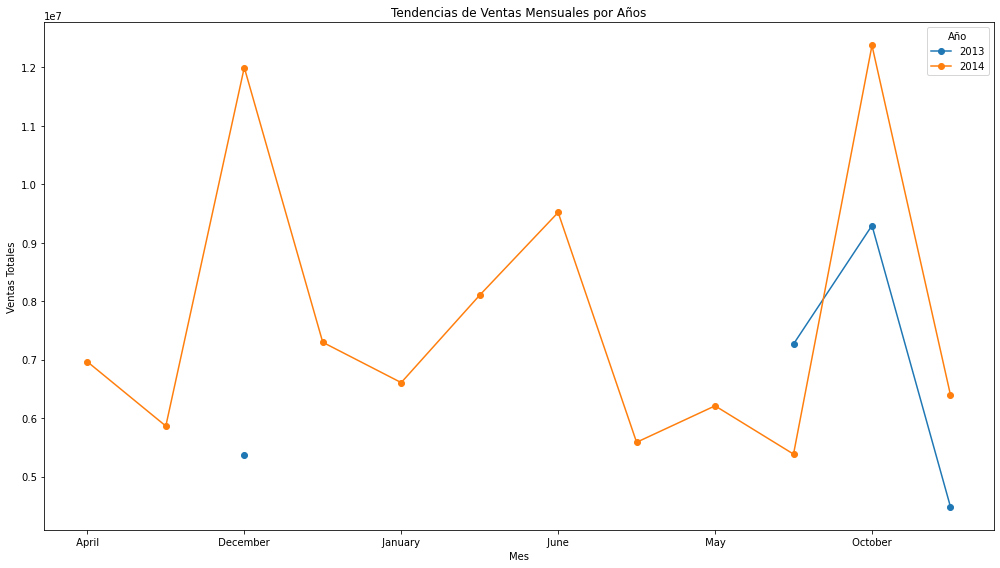

In [28]:
monthy_sales = datos_df.groupby(['year', 'month_name'])['sales'].sum().unstack()

#visualización
monthy_sales.T.plot(kind = 'line', figsize=(14, 8), marker='o')
plt.title('Tendencias de Ventas Mensuales por Años')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Año', loc='upper right')
plt.tight_layout()
plt.show()


Una vez realizada la limpieza de datos y el análisis exploratorio inicial, se ha decidido enfocar este proyecto en predecir y mejorar el Net Profit Margin (%) por país. Identificaremos qué factores, como descuentos o costos de producción, afectan más al beneficio neto y se verán posibles ajustes para maximizarlos.

## Predecir y Mejorar Net Profit Margin (%)

Relación entre descuentos, costos y beneficios:

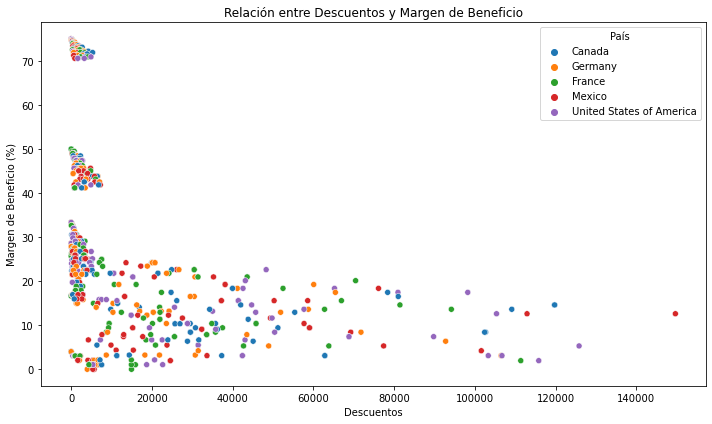

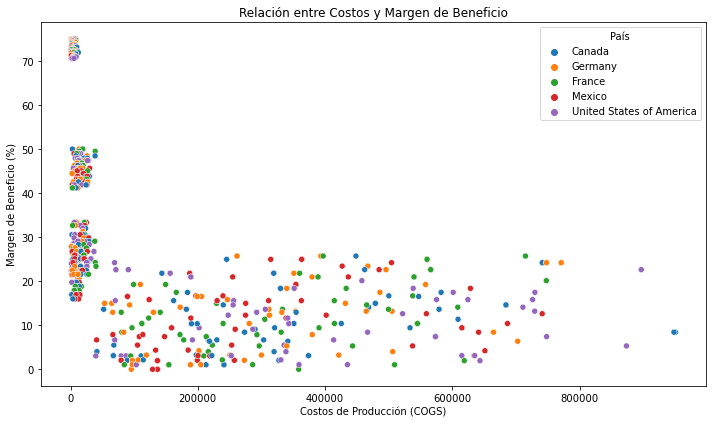

In [29]:
# Relación entre descuentos y margen de beneficio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_df, x='discounts', y='Profit Margin (%)', hue='country')
plt.title('Relación entre Descuentos y Margen de Beneficio')
plt.xlabel('Descuentos')
plt.ylabel('Margen de Beneficio (%)')
plt.legend(title='País')
plt.tight_layout()
plt.show()

# Relación entre costos y margen de beneficio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_df, x='cogs', y='Profit Margin (%)', hue='country')
plt.title('Relación entre Costos y Margen de Beneficio')
plt.xlabel('Costos de Producción (COGS)')
plt.ylabel('Margen de Beneficio (%)')
plt.legend(title='País')
plt.tight_layout()
plt.show()

MATRIZ DE CORRELACIÓN

In [30]:
# Calcular el beneficio ('Profit') por cada fila
datos_df['Profit'] = datos_df['sale_price'] - datos_df['manufacturing_price']

# Calcular el beneficio neto por cada fila
datos_df['Net Profit'] = (datos_df['Profit'] * datos_df['sales'])

display(datos_df)


,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year,Profit Margin (%),Profit,Net Profit
0,Government,Canada,altavoz,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,50.00,17.0,550290.00
1,Government,Germany,altavoz,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,50.00,17.0,449140.00
2,Midmarket,France,altavoz,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014,33.33,12.0,392040.00
3,Midmarket,Germany,altavoz,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014,33.33,12.0,159840.00
4,Midmarket,Mexico,altavoz,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014,33.33,12.0,444600.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,teclado,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014,1.96,40.0,25245000.00
696,Small Business,Mexico,teclado,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014,1.96,40.0,5569200.00
697,Government,Mexico,termometro,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014,15.97,2.0,16279.20
698,Government,Canada,pulsera,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014,15.97,-3.0,-12905.55


In [31]:
import pandas as pd
import numpy as np

# Definir las columnas categóricas
categorical_columns = ['segment', 'country', 'product', 'discount_band', 'month_name']

# Aplicar One-Hot Encoding
correlation_data_encoded = pd.get_dummies(
    datos_df[['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 
              'sales', 'cogs', 'Profit', 'month_number', 'year', 'Net Profit'] + categorical_columns],
    drop_first=True  # Para evitar la multicolinealidad
)

# Ver las primeras filas del dataframe con las variables codificadas
print(correlation_data_encoded.head())


   units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
0      1618.5                  3.0        20.0      32370.0        0.0   
1      1321.0                  3.0        20.0      26420.0        0.0   
2      2178.0                  3.0        15.0      32670.0        0.0   
3       888.0                  3.0        15.0      13320.0        0.0   
4      2470.0                  3.0        15.0      37050.0        0.0   

     sales     cogs  Profit  month_number  year  ...  month_name_ December   \
0  32370.0  16185.0    17.0             1  2014  ...                      0   
1  26420.0  13210.0    17.0             1  2014  ...                      0   
2  32670.0  21780.0    12.0             6  2014  ...                      0   
3  13320.0   8880.0    12.0             6  2014  ...                      0   
4  37050.0  24700.0    12.0             6  2014  ...                      0   

   month_name_ February   month_name_ January   month_name_ July   \
0          

In [32]:
# Generar la matriz de correlación
correlation_matrix = correlation_data_encoded.corr()

# Mostrar la matriz de correlación
import pandas as pd
import numpy as np

# Establecer la diagonal en NaN para excluir las correlaciones de las variables consigo mismas
np.fill_diagonal(correlation_matrix.values, np.nan)

# Ordenar la matriz de correlación por valores absolutos (para ver las más significativas)
correlation_matrix_sorted = correlation_matrix.stack().sort_values(ascending=False)

# Filtrar solo las correlaciones mayores a 0.5 (o el umbral que necesites)
correlation_matrix_sorted = correlation_matrix_sorted[correlation_matrix_sorted > 0.5]

# Filtrar solo las correlaciones menores a 0.5 (o el umbral que necesites)
##correlation_matrix_sorted = correlation_matrix_sorted[correlation_matrix_sorted < 0.5]

# Mostrar solo las correlaciones que no son 1 (diagonal)
correlation_non_1 = correlation_matrix_sorted[correlation_matrix_sorted != 1]

# Mostrar las correlaciones no iguales a 1
pd.set_option('display.max_rows', 100)  # Establecer un límite para ver todas las filas
print(correlation_non_1)


gross_sales             sales                     0.998174
sales                   gross_sales               0.998174
gross_sales             cogs                      0.994519
cogs                    gross_sales               0.994519
                        sales                     0.992244
sales                   cogs                      0.992244
gross_sales             Net Profit                0.823682
Net Profit              gross_sales               0.823682
                        sales                     0.822809
sales                   Net Profit                0.822809
gross_sales             sale_price                0.808250
sale_price              gross_sales               0.808250
sales                   sale_price                0.805878
sale_price              sales                     0.805878
cogs                    sale_price                0.799335
sale_price              cogs                      0.799335
cogs                    Net Profit                0.7970

REGRESIÓN LINEAL 1

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Asegúrate de que 'correlation_data_encoded' ya esté preparado con One-Hot Encoding
# Seleccionar las variables predictoras basadas en la matriz de correlación
X = correlation_data_encoded[['gross_sales', 'sales', 'sale_price', 'cogs', 'discounts']]

# Variable dependiente: 'Net Profit'
y = correlation_data_encoded['Net Profit']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Mostrar el rendimiento del modelo
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes de regresión (peso de cada variable en el beneficio neto)
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print("\nCoeficientes de regresión:")
print(coef_df)

# Mostrar las variables más significativas (las que tienen los coeficientes más grandes en valor absoluto)
coef_df['Abs_Coeff'] = coef_df['Coeficientes'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeff', ascending=False)

print("\nVariables más significativas:")
print(coef_df.head(10))  # Mostrar las 10 variables más significativas


Error cuadrático medio (MSE): 1545295818768288.2
Coeficiente de determinación (R^2): 0.666478137844054

Coeficientes de regresión:
             Coeficientes
gross_sales -2.764188e+08
sales        2.764195e+08
sale_price   4.606162e+04
cogs        -6.928377e+02
discounts    2.764198e+08

Variables más significativas:
             Coeficientes     Abs_Coeff
discounts    2.764198e+08  2.764198e+08
sales        2.764195e+08  2.764195e+08
gross_sales -2.764188e+08  2.764188e+08
sale_price   4.606162e+04  4.606162e+04
cogs        -6.928377e+02  6.928377e+02


REGRESION LINEAL CON VALIDACION CRUZADA

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Asegúrate de que 'correlation_data_encoded' ya esté preparado con One-Hot Encoding
# Seleccionar las variables predictoras basadas en la matriz de correlación
X = correlation_data_encoded[['gross_sales', 'sales', 'sale_price', 'cogs', 'discounts']]

# Variable dependiente: 'Net Profit'
y = correlation_data_encoded['Net Profit']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada utilizando 5 pliegues (folds)
cv_scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Negativo por convención de sklearn

# Imprimir los resultados de la validación cruzada (MSE)
print("\nResultados de la validación cruzada (MSE):")
print(cv_scores_mse)

# Calcular el MSE promedio de la validación cruzada
mean_cv_mse = np.mean(cv_scores_mse)
print(f"\nPromedio de MSE en la validación cruzada: {mean_cv_mse}")

# Realizar la validación cruzada para obtener el R^2 promedio
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
mean_cv_r2 = np.mean(cv_scores_r2)
print(f"\nPromedio de R^2 en la validación cruzada: {mean_cv_r2}")



Resultados de la validación cruzada (MSE):
[-1.52659659e+15 -1.24147258e+15 -1.18229473e+15 -1.12882466e+15
 -6.30190843e+14]

Promedio de MSE en la validación cruzada: -1141875879523440.5

Promedio de R^2 en la validación cruzada: 0.7042337629786378


REGRESION POLINOMIAL

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Asegúrate de que 'correlation_data_encoded' ya esté preparado con One-Hot Encoding
# Seleccionar las variables predictoras basadas en la matriz de correlación
X = correlation_data_encoded[['gross_sales', 'sales', 'sale_price', 'cogs', 'discounts']]  # Variables predictoras

# Variable dependiente: 'Net Profit'
y = correlation_data_encoded['Net Profit']  # Variable dependiente

# Transformación de las variables predictoras a un espacio de características polinómicas (de grado 2 en este caso)
poly = PolynomialFeatures(degree=2)  # Ajusta el grado si necesitas una mayor complejidad
X_poly = poly.fit_transform(X)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Establecer el número de particiones para la validación cruzada (por ejemplo, 10 pliegues)
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Validación cruzada múltiple para obtener MSE
cv_scores_mse = cross_val_score(model, X_poly, y, cv=kf, scoring='neg_mean_squared_error')

# Calcular el MSE promedio de la validación cruzada
mean_cv_mse = np.mean(cv_scores_mse)
print(f"\nPromedio de MSE en la validación cruzada múltiple (Regresión Polinómica): {mean_cv_mse}")

# Validación cruzada múltiple para obtener R^2
cv_scores_r2 = cross_val_score(model, X_poly, y, cv=kf, scoring='r2')

# Calcular el R^2 promedio de la validación cruzada
mean_cv_r2 = np.mean(cv_scores_r2)
print(f"\nPromedio de R^2 en la validación cruzada múltiple (Regresión Polinómica): {mean_cv_r2}")

# Adicionalmente, si deseas realizar validación cruzada con varias métricas personalizadas, puedes usar `make_scorer`
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

# Validación cruzada con múltiples métricas
cv_scores_mse_multi = cross_val_score(model, X_poly, y, cv=kf, scoring=mse_scorer)
cv_scores_r2_multi = cross_val_score(model, X_poly, y, cv=kf, scoring=r2_scorer)

# Mostrar las métricas
print("\nValidación cruzada con varias métricas (Regresión Polinómica):")
print(f"Promedio MSE (custom scorer): {np.mean(cv_scores_mse_multi)}")
print(f"Promedio R^2 (custom scorer): {np.mean(cv_scores_r2_multi)}")



Promedio de MSE en la validación cruzada múltiple (Regresión Polinómica): -1330333292594976.5

Promedio de R^2 en la validación cruzada múltiple (Regresión Polinómica): 0.6608310475404667

Validación cruzada con varias métricas (Regresión Polinómica):
Promedio MSE (custom scorer): 1330333292594976.5
Promedio R^2 (custom scorer): 0.6608310475404667


REGRESION LINEAL MULTIPLE

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Asegúrate de que 'correlation_data_encoded' ya esté preparado con One-Hot Encoding
# Seleccionar las variables predictoras basadas en la matriz de correlación
X = correlation_data_encoded[['gross_sales', 'sales', 'sale_price', 'cogs', 'discounts']]  # Variables predictoras

# Variable dependiente: 'Net Profit'
y = correlation_data_encoded['Net Profit']  # Variable dependiente

# Crear el modelo de regresión lineal múltiple
model = LinearRegression()

# Establecer el número de particiones para la validación cruzada (por ejemplo, 10 pliegues)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validación cruzada múltiple para obtener MSE
cv_scores_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calcular el MSE promedio de la validación cruzada
mean_cv_mse = np.mean(cv_scores_mse)
print(f"\nPromedio de MSE en la validación cruzada múltiple: {mean_cv_mse}")

# Validación cruzada múltiple para obtener R^2
cv_scores_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Calcular el R^2 promedio de la validación cruzada
mean_cv_r2 = np.mean(cv_scores_r2)
print(f"\nPromedio de R^2 en la validación cruzada múltiple: {mean_cv_r2}")

# Adicionalmente, si deseas realizar validación cruzada con varias métricas personalizadas, puedes usar `make_scorer`
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

# Validación cruzada con múltiples métricas
cv_scores_mse_multi = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
cv_scores_r2_multi = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

# Mostrar las métricas
print("\nValidación cruzada con varias métricas:")
print(f"Promedio MSE (custom scorer): {np.mean(cv_scores_mse_multi)}")
print(f"Promedio R^2 (custom scorer): {np.mean(cv_scores_r2_multi)}")



Promedio de MSE en la validación cruzada múltiple: -1134560617388783.2

Promedio de R^2 en la validación cruzada múltiple: 0.7134709597951541

Validación cruzada con varias métricas:
Promedio MSE (custom scorer): 1134560617388783.2
Promedio R^2 (custom scorer): 0.7134709597951541


In [37]:
# Entrenar el modelo de regresión lineal
model.fit(X, y)

# Obtener el término independiente (intercepto)
intercept = model.intercept_

# Obtener los coeficientes de las variables predictoras
coefficients = model.coef_

# Crear un DataFrame con los coeficientes y las variables
coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coeficientes'])

# Mostrar el intercepto y los coeficientes
print(f"\nIntercepto (β₀): {intercept}")
print("\nCoeficientes de las variables:")
print(coef_df)

# Imprimir la ecuación de regresión
equation = f"Net Profit = {intercept:.2f}"
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
    
print("\nEcuación de la regresión lineal:")
print(equation)



Intercepto (β₀): -10589476.274453346

Coeficientes de las variables:
             Coeficientes
gross_sales -1.231691e+08
sales        1.231698e+08
sale_price   4.468728e+04
cogs        -6.108531e+02
discounts    1.231698e+08

Ecuación de la regresión lineal:
Net Profit = -10589476.27 + (-123169125.47 * gross_sales) + (123169795.31 * sales) + (44687.28 * sale_price) + (-610.85 * cogs) + (123169809.55 * discounts)


REGRESION CON SOPORTE VECTORIAL

In [38]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Asegúrate de que 'correlation_data_encoded' ya esté preparado con One-Hot Encoding
# Seleccionar las variables predictoras basadas en la matriz de correlación
X = correlation_data_encoded[['gross_sales', 'sales', 'sale_price', 'cogs', 'discounts']]  # Variables predictoras

# Variable dependiente: 'Net Profit'
y = correlation_data_encoded['Net Profit']  # Variable dependiente

# Escalar las características (es muy importante para SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo de Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')

# Parámetros para optimizar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valor de penalización
    'epsilon': [0.01, 0.1, 0.5, 1],  # Margen de tolerancia
    'kernel': ['rbf', 'linear']  # Tipo de kernel
}

# Usar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Obtener el mejor modelo
best_svr_model = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred = best_svr_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Mostrar el rendimiento del modelo
print(f"\nError cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Validación cruzada
cv_scores_mse = cross_val_score(best_svr_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')  # 5 pliegues
cv_scores_r2 = cross_val_score(best_svr_model, X_scaled, y, cv=5, scoring='r2')

# Promedio de las métricas en la validación cruzada
mean_cv_mse = np.mean(cv_scores_mse)
mean_cv_r2 = np.mean(cv_scores_r2)

print(f"\nPromedio MSE en la validación cruzada (SVR): {mean_cv_mse}")
print(f"Promedio R^2 en la validación cruzada (SVR): {mean_cv_r2}")


Mejores parámetros encontrados: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}

Error cuadrático medio (MSE): 5687645759235501.0
Coeficiente de determinación (R^2): -0.22756703400362688

Promedio MSE en la validación cruzada (SVR): -4705298288265786.0
Promedio R^2 en la validación cruzada (SVR): -0.20326613286201828


UTILIZAR ALGORITMO de ELIMINACIÖN RECURSIVO PARA ELIMINAR ATRIBUTOS Y MEJORAR LA REGRESION (tema 8)

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
!pip install xgboost
from xgboost import XGBRegressor

# Dividir los datos en variables predictoras y objetivo
#X = correlation_data_encoded[['gross_sales', 'sales', 'cogs']]  # Variables predictoras
X = correlation_data_encoded.drop(columns=['Net Profit', 'sale_price', 'Profit'])

y = correlation_data_encoded['Net Profit']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Eliminación Recursiva de Características (RFE)
print("Realizando RFE para selección de características...")
base_model = LinearRegression()  # Modelo base para evaluar características
rfe = RFE(estimator=base_model, n_features_to_select=5)  # Seleccionar las 5 mejores características
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Obtener las características seleccionadas por RFE
selected_features = X.columns[rfe.support_]
print(f"Características seleccionadas por RFE: {list(selected_features)}")

# Selección de características importantes usando RandomForestRegressor
print("\nSeleccionando características importantes con RandomForest...")
rf_best = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_best.fit(X_train, y_train)

# Obtener las características más importantes
feature_importances = rf_best.feature_importances_
important_features = X.columns[feature_importances > 0.01]  # Usar un umbral de 0.01 para seleccionar características
X_selected = X[important_features]

print(f"Características importantes seleccionadas por Random Forest: {list(important_features)}")

# Asegúrate de que X_selected tiene el mismo número de muestras que y_train
X_train_selected = X_selected.loc[X_train.index]  # Aseguramos que X_train_selected tiene las mismas filas que y_train

# 1. Gradient Boosting Regressor
print("\nAjustando Gradient Boosting Regressor...")
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0]
}
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='r2', n_jobs=-1)
gbr_grid.fit(X_train_rfe, y_train)
gbr_best = gbr_grid.best_estimator_
y_pred_gbr = gbr_best.predict(X_test_rfe)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - Best Params: {gbr_grid.best_params_}, MSE: {mse_gbr:.2f}, R2: {r2_gbr:.4f}")

# Validación cruzada para Gradient Boosting
cv_scores_gbr = cross_val_score(gbr_best, X_train_rfe, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting - Cross-Validation R2: {cv_scores_gbr.mean():.4f}")

# 2. Random Forest Regressor
print("\nAjustando Random Forest Regressor...")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train_selected, y_train)  # Ajustamos el modelo con las características seleccionadas
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test[important_features])  # Utilizamos las características importantes para la predicción
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Best Params: {rf_grid.best_params_}, MSE: {mse_rf:.2f}, R2: {r2_rf:.4f}")

# Validación cruzada para Random Forest
cv_scores_rf = cross_val_score(rf_best, X_train_selected, y_train, cv=5, scoring='r2')
print(f"Random Forest - Cross-Validation R2: {cv_scores_rf.mean():.4f}")

# Comparar los resultados
print("\nResumen de rendimiento de los modelos tras RFE y selección de características:")
models = ['Gradient Boosting', 'Random Forest']
mse_values = [mse_gbr, mse_rf]
r2_values = [r2_gbr, r2_rf]
for model, mse, r2 in zip(models, mse_values, r2_values):
    print(f"{model} - MSE: {mse:.2f}, R2: {r2:.4f}")


Realizando RFE para selección de características...
Características seleccionadas por RFE: ['gross_sales', 'discounts', 'sales', 'segment_Enterprise', 'product_camara']

Seleccionando características importantes con RandomForest...
Características importantes seleccionadas por Random Forest: ['units_sold', 'manufacturing_price', 'gross_sales', 'sales', 'segment_Enterprise']

Ajustando Gradient Boosting Regressor...
Gradient Boosting - Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}, MSE: 1321737527159205.50, R2: 0.7147
Gradient Boosting - Cross-Validation R2: 0.7756

Ajustando Random Forest Regressor...
Random Forest - Best Params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}, MSE: 132222053842688.31, R2: 0.9715
Random Forest - Cross-Validation R2: 0.9694

Resumen de rendimiento de los modelos tras RFE y selección de características:
Gradient Boosting - MSE: 1321737527159205.50, R2: 0.7147
Random Fo